In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


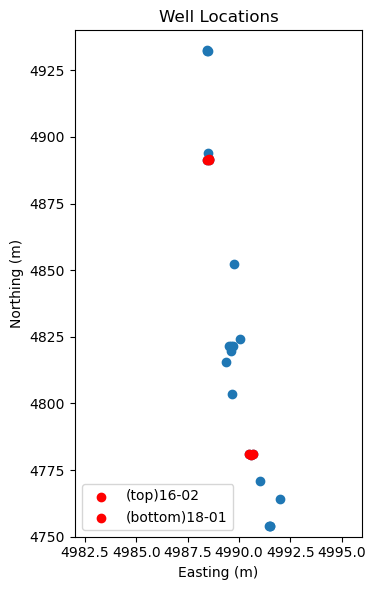

In [3]:
filename_loc = "Geodetic_Data_2020.xlsx"
loc = pd.read_excel(filename_loc,
                   names = ["pt", "description", "E", "N", "z", "other"])

plt.figure(figsize = (4, 6))
plt.scatter(loc["E"], loc["N"])
plt.scatter(loc[4:7]["E"], loc[4:7]["N"], c = 'r', label = "(top)16-02")
plt.scatter(loc[15:18]["E"], loc[15:18]["N"], c = 'r', label = "(bottom)18-01")
plt.xlim(4982, 4996)
plt.ylim(4750, 4940)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("Well Locations")
plt.legend()

plt.tight_layout()


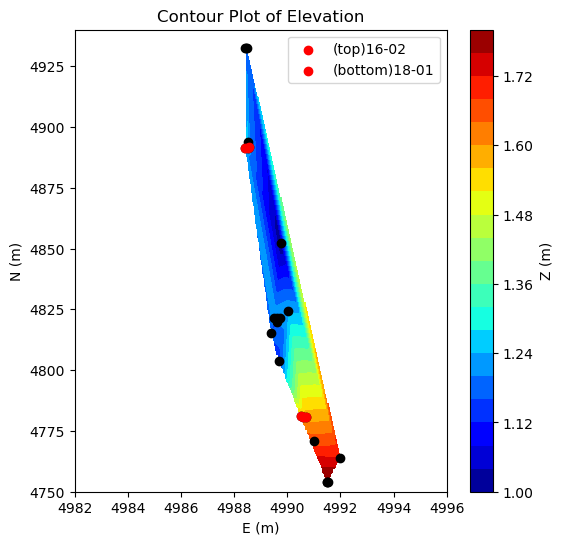

In [4]:
E = np.array(loc["E"])
N = np.array(loc["N"])
Z = np.array(loc["z"])

grid_E, grid_N = np.meshgrid(
    np.linspace(E.min(), E.max(), 100),
    np.linspace(N.min(), N.max(), 100)
)

grid_Z = griddata((E, N), Z, (grid_E, grid_N), method='linear')

plt.figure(figsize=(6, 6))
contour = plt.contourf(grid_E, grid_N, grid_Z, levels=20, cmap='jet')
plt.colorbar(contour, label='Z (m)')
plt.xlabel('E (m)')
plt.ylabel('N (m)')
plt.xlim(4982, 4996)
plt.ylim(4750, 4940)
plt.title('Contour Plot of Elevation')
plt.scatter(loc["E"], loc["N"], c = 'k')
plt.scatter(loc[4:7]["E"], loc[4:7]["N"], c = 'r', label = "(top)16-02")
plt.scatter(loc[15:18]["E"], loc[15:18]["N"], c = 'r', label = "(bottom)18-01")
plt.legend()
# plt.scatter(E, N, c=Z, edgecolor='k', cmap='jet')  
